In [9]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
np.seed = 7
train_data = np.random.normal(size = (100,2))
train_labels = np.zeros(100)

In [3]:
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

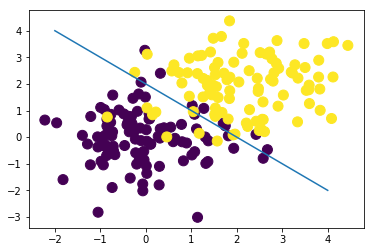

In [4]:
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=100)
plt.plot(range(-2,5), range(4,-3,-1))

In [5]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [6]:
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=17)
clf_tree.fit(train_data, train_labels)
xx, yy = get_grid(train_data)
print(xx.ravel())
print(yy.ravel())

[-3.22006557 -3.21006557 -3.20006557 ...  5.41993443  5.42993443
  5.43993443]
[-4.01284533 -4.01284533 -4.01284533 ...  5.36715467  5.36715467
  5.36715467]


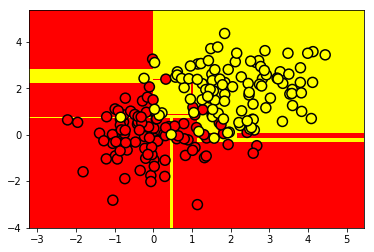

In [7]:
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)

In [26]:
df = pd.read_csv('D:/Prog/ML/Coursera/Yandex rus/random forest classifier/abalone.csv')

In [27]:
df['Sex'] = df['Sex'].map({'M':True,'F':False, 'I':np.nan})
df = df.dropna()
df['Sex'] = df['Sex'].astype('bool')

In [47]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,True,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,True,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,False,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,True,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,False,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sex', axis=1), df['Sex'], test_size = 0.25)

In [80]:
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors=10)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [81]:
accuracy_score(y_test, tree.predict(X_test))

0.5571227080394923

In [68]:
accuracy_score(y_test, knn.predict(X_test))

0.4922425952045134

In [82]:
tree_params = {'max_depth':range(1,20), 'max_features':range(1,9)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 152 candidates, totalling 760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


fuck


[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    8.5s finished


In [83]:
tree_grid.best_params_

{'max_depth': 11, 'max_features': 8}

In [84]:
tree_grid.best_score_

0.5479774223894638

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

In [87]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

In [88]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.2s finished
D:\Prog\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Prog\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [89]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 3}, 0.5399811853245532)

In [91]:
accuracy_score(y_test, knn_grid.predict(X_test))

D:\Prog\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.49647390691114246

In [97]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
cross_val_score(forest, X_train, y_train, cv=5).mean()

0.5494174339414213

In [103]:
forest_params = {'max_depth':range(1,20), 'max_features':range(1,9)}
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 152 candidates, totalling 760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'max_features': range(1, 9)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [104]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 8, 'max_features': 4}, 0.5602069614299153)

In [107]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

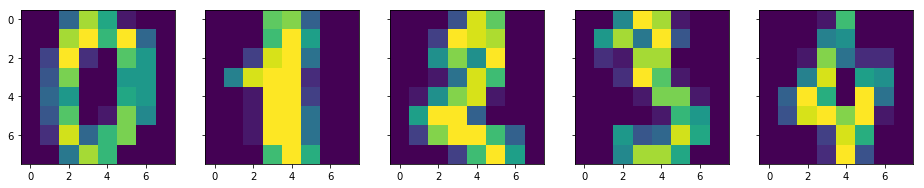

In [115]:
f,axes = plt.subplots(1,5, sharey=True, figsize=(16,6))
for i in range(5):
    axes[i].imshow(X[i,:].reshape([8,8]))

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [118]:
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [119]:
accuracy_score(y_test, knn.predict(X_test)), accuracy_score(y_test, tree.predict(X_test)) 

(0.9822222222222222, 0.6844444444444444)

In [123]:
tree_params = {'max_depth':[1,2,3,5,10,20,25,30,40,50,64],
               'max_features':[1,2,3,5,10,20,30,50,64]}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train,y_train)
tree_grid.best_params_, tree_grid.best_score_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    6.3s finished
D:\Prog\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'max_depth': 25, 'max_features': 50}, 0.8589458054936897)

In [126]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5).mean()

0.9851276310794453

In [127]:
cross_val_score(RandomForestClassifier(),X_train, y_train, cv=5).mean()

D:\Prog\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Prog\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Prog\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Prog\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Prog\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

0.9464353109322312